 以下是Processing Linear Data 
Accuracy: 1.000
SVM with Linear Kernel_linear data_C=0.01_n_support_vectors:18


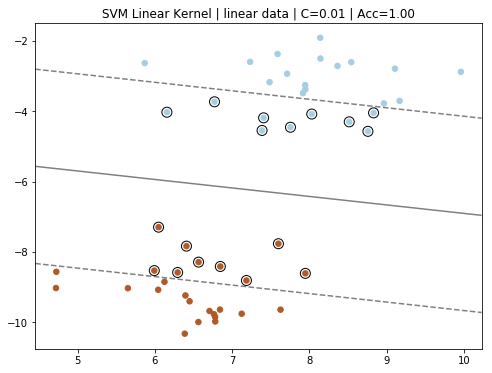

Accuracy: 1.000
SVM with Linear Kernel_linear data_C=0.1_n_support_vectors:4


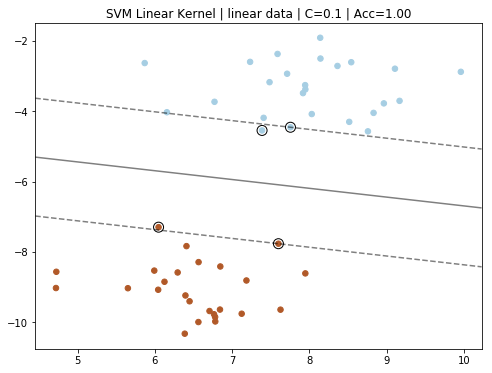

Accuracy: 1.000
SVM with Linear Kernel_linear data_C=1_n_support_vectors:3


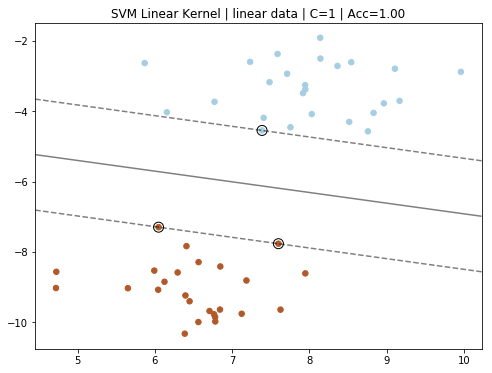

Accuracy: 1.000
SVM with Linear Kernel_linear data_C=10_n_support_vectors:3


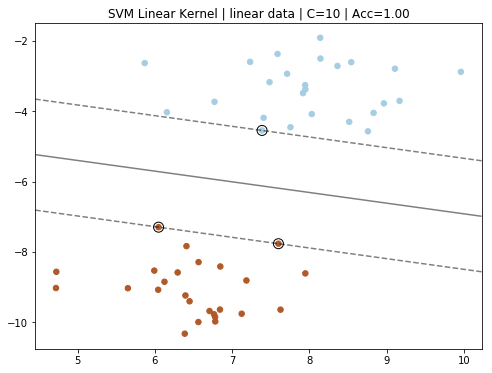

Accuracy: 1.000
SVM with Linear Kernel_linear data_C=100_n_support_vectors:3


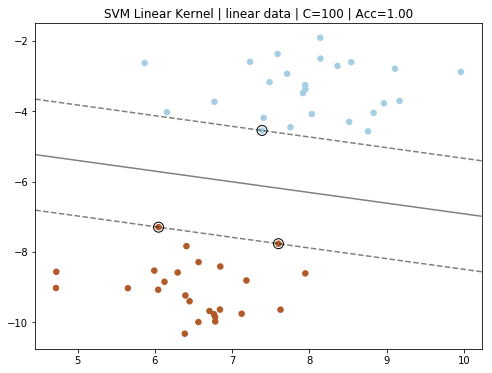

 以下是Processing Overlapping Data 
Accuracy: 0.920
SVM with Linear Kernel_overlapping_data_C=0.01_n_support_vectors:3


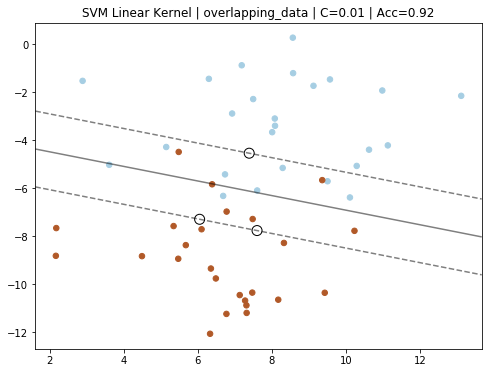

Accuracy: 0.920
SVM with Linear Kernel_overlapping_data_C=0.1_n_support_vectors:3


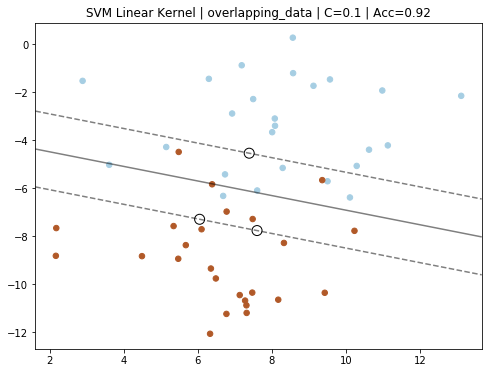

Accuracy: 0.940
SVM with Linear Kernel_overlapping_data_C=1_n_support_vectors:3


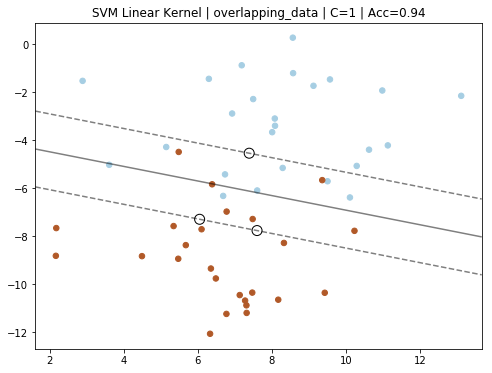

Accuracy: 0.920
SVM with Linear Kernel_overlapping_data_C=10_n_support_vectors:3


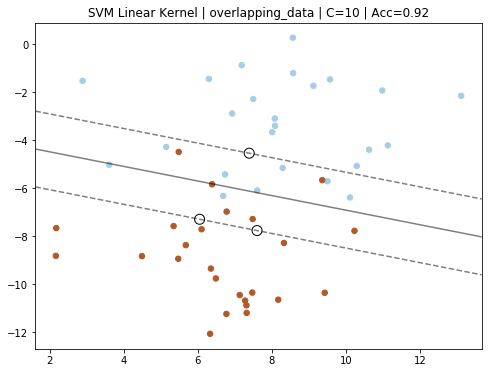

Accuracy: 0.920
SVM with Linear Kernel_overlapping_data_C=100_n_support_vectors:3


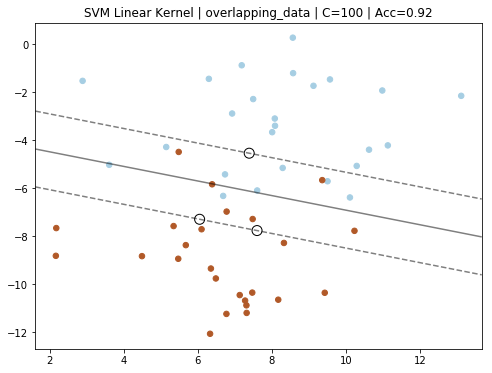

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 生成线性可分数据
X, y = datasets.make_blobs(n_samples=50, centers=2, 
                          random_state=6, cluster_std=0.8)
dataname="linear data"

# ==================== TODO 3 ====================
# 第三个任务：尝试生成重叠的数据，进一步进行第一个任务
X2, y2 = datasets.make_blobs(n_samples=50, centers=2, 
                            random_state=6, cluster_std=2.0)  # 更大的标准差 → 重叠
dataname2 = "overlapping_data"


# 可视化部分
def plot(X, y, svm_model, data_name, C_num):
   
   # 可视化结果
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

   # 创建网格来绘制决策边界
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_linear.decision_function(xy).reshape(XX.shape)

   # 绘制决策边界和间隔
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])
   #标记支持向量
    ax.scatter(svm_linear.support_vectors_[:, 0], 
           svm_linear.support_vectors_[:, 1], 
           s=100, linewidth=1, facecolors='none', edgecolors='k')

   # ==================== TODO 2 ====================  
   # 第二个任务：计算模型准确率
    y_pred = svm_model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy: {accuracy:.3f}')


   # 计算支持向量数量
    n_support_vectors=len(svm_linear.support_vectors_)
    print(f'SVM with Linear Kernel_{data_name}_C={C_num}_n_support_vectors:{n_support_vectors}')

   # 输出并保存图像
    title = f'SVM Linear Kernel | {data_name} | C={C_num} | Acc={accuracy:.2f}'
    plt.title(title)
    filename = f'svm_{data_name}_C={C_num}.png'
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    plt.show()


# ==================== TODO 1 ====================
#第一个任务：尝试创建SVM模型，并使用上面给出的绘图函数绘制图像，
#           观察分类效果，并观察不同C值对分类的影响
C_values = [0.01, 0.1, 1, 10, 100]
# 对线性可分数据
print(" 以下是Processing Linear Data ")
for C in C_values:
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X, y)
    plot(X, y, svm_linear, dataname, C)

# 对重叠数据
print(" 以下是Processing Overlapping Data ")
for C in C_values:
    svm_linear2 = SVC(kernel='linear', C=C)
    svm_linear2.fit(X2, y2)
    plot(X2, y2, svm_linear2, dataname2, C)